# 🧠 Model Training: House Price Estimator

This notebook builds a full Machine Learning pipeline to predict the log-transformed `SalePrice_log` of houses in Ames, Iowa.

We will:
- Load a cleaned dataset
- Define features and target
- Preprocess numeric and categorical data
- Train a Linear Regression model
- Evaluate its performance
- Save the model for later use in Streamlit


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import joblib
import os

## 📥 Load Cleaned Dataset
We use the previously cleaned dataset stored in `data/house_prices_cleaned.csv`.


In [2]:
df = pd.read_csv("../data/house_prices_cleaned.csv")
df.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice,SalePrice_log
0,856,854.0,3.0,No,706,GLQ,150,548,RFn,2003.0,...,65.0,196.0,61,5,7,856,2003,2003,208500,12.247694
1,1262,0.0,3.0,Gd,978,ALQ,284,460,RFn,1976.0,...,80.0,0.0,0,8,6,1262,1976,1976,181500,12.109011
2,920,866.0,3.0,Mn,486,GLQ,434,608,RFn,2001.0,...,68.0,162.0,42,5,7,920,2001,2002,223500,12.317167
3,961,0.0,3.0,No,216,ALQ,540,642,Unf,1998.0,...,60.0,0.0,35,5,7,756,1915,1970,140000,11.849398
4,1145,0.0,4.0,Av,655,GLQ,490,836,RFn,2000.0,...,84.0,350.0,84,5,8,1145,2000,2000,250000,12.429216


### 🎯 Define Feature Matrix and Target Variable

We selected six numerical features that are known to influence house prices:

- `OverallQual` — Overall material and finish quality  
- `GrLivArea` — Above ground living area (sq ft)  
- `GarageArea` — Size of garage (sq ft)  
- `YearBuilt` — Original construction date  
- `TotalBsmtSF` — Total basement area  
- `LotArea` — Lot size in square feet  

The target variable is `SalePrice_log`, the log-transformed sale price.


In [3]:
X = df[
    ["OverallQual", "GrLivArea", "GarageArea", "YearBuilt", "TotalBsmtSF", "LotArea"]
]
y = df["SalePrice_log"]

## 🔀 Split Data

Split the dataset into 80% training and 20% testing sets for model evaluation.


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### 🔧 Preprocessing and Pipeline Setup

We'll simplify our pipeline to numeric columns only, since our selected dataset includes only numeric features.


In [5]:
from sklearn.impute import SimpleImputer

# Use only valid, existing numeric features
numeric_features = [
    "OverallQual",
    "GrLivArea",
    "GarageArea",
    "YearBuilt",
    "TotalBsmtSF",
    "LotArea",
]

numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])

preprocessor = ColumnTransformer(
    transformers=[("num", numeric_transformer, numeric_features)]
)

In [6]:
model = Pipeline(
    steps=[("preprocessor", preprocessor), ("regressor", LinearRegression())]
)

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['OverallQual', 'GrLivArea',
                                                   'GarageArea', 'YearBuilt',
                                                   'TotalBsmtSF',
                                                   'LotArea'])])),
                ('regressor', LinearRegression())])

### 📈 Model Evaluation

We'll now evaluate the model's performance using:

- **R² Score**: How much variance is explained by the model  
- **Root Mean Squared Error (RMSE)**: Average prediction error  
- **Scatter plot** to compare predicted vs. actual values


In [7]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Predict on test set
y_pred = model.predict(X_test)

# Evaluation metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")

R² Score: 0.842
RMSE: 0.172


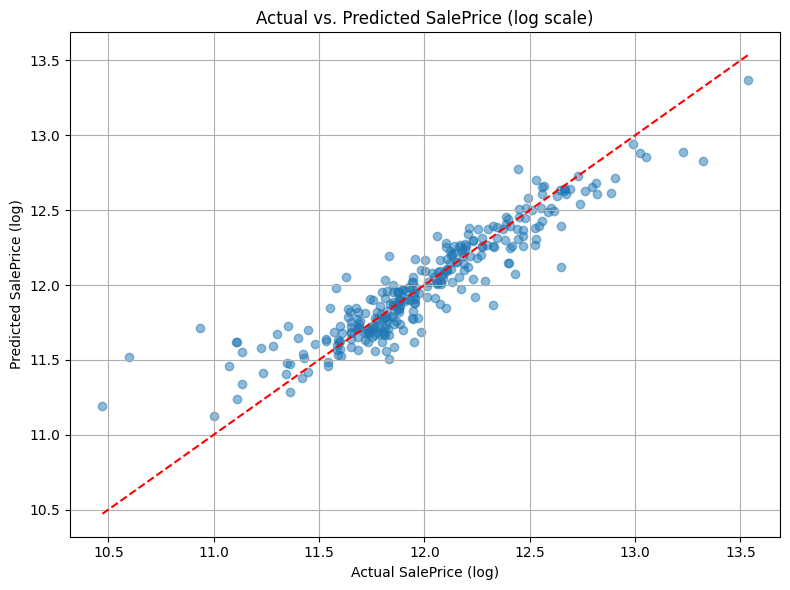

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "--r")
plt.xlabel("Actual SalePrice (log)")
plt.ylabel("Predicted SalePrice (log)")
plt.title("Actual vs. Predicted SalePrice (log scale)")
plt.grid(True)
plt.tight_layout()
plt.show()

### 💾 Save Trained Model

Save the trained pipeline using `joblib` so it can be used in the Streamlit app.


In [9]:
import joblib
import os

# Ensure the models directory exists
os.makedirs("../models", exist_ok=True)

# Save model
joblib.dump(model, "../models/linreg_model.joblib")

['../models/linreg_model.joblib']